<div style="background-color: #e6eef7; padding:30px; text-align: center;">
    
# Część 2 - Analiza Eksploracyjna
##### Inga Maziarz, Krzysztof Budzyński

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

<div style="background-color: #e6eef7; padding:30px;">

# Zbiór danych

Analizowanym zbiorem danych jest zbiór zawierający blisko 9 tysięcy rekordów popularnych produktów spożywczych wraz z kalorycznością produktu w porcji 100 gramów oraz zawartością poszczególnych makro- i mikrokskładników (około 70 różnych związków/pierwiastków). Przed analizą dane zostały odpowiednio przygotowane, tj.:
* Usunięto zbędne kolumny. 

> Pierwsza kolumna zawierała indeks produktu - było to powieleniem indeksów powstałych poprzez włożenie danych do ramki.

> Wszystkie wartości w kolumnie *serving_size* były jednakowe. Przyjęto, że kaloryczność każdego produktu podana jest jako kcal/100 g

> Wszystkie wartości w kolumnie *lucopene* były jednakowe i równe zeru. 

* W miarę możliwości zamieniono dane na typ numeryczny.

> W danej kolumnie wartości były wyrażone w tych samych jednostkach. Zanotowano tę jednostkę w nazwie kolumny, a wartości zostały przekonwertowane na typ *float*

* Obsłużono rekordy z wartościami *NaN*

> Wywnioskowano, że w tym przypadku wartości *NaN* oznaczają wartości bliskie zeru, więc zostały one zastąpione zerami.

Ostatecznie usunięto 3 kolumny. Liczba rekordów pozostała taka sama.
</div>

In [2]:
df = pd.read_csv('nutrition.csv') 
df

Unnamed: 0                                               name  \
0              0                                         Cornstarch   
1              1                                       Nuts, pecans   
2              2                                      Eggplant, raw   
3              3                                     Teff, uncooked   
4              4                                    Sherbet, orange   
...          ...                                                ...   
8784        8784  Beef, raw, all grades, trimmed to 0" fat, sepa...   
8785        8785  Lamb, cooked, separable lean only, composite o...   
8786        8786  Lamb, raw, separable lean and fat, composite o...   
8787        8787  Beef, raw, all grades, trimmed to 0" fat, sepa...   
8788        8788  Beef, raw, all grades, trimmed to 0" fat, sepa...   

     serving_size  calories total_fat saturated_fat cholesterol    sodium  \
0           100 g       381      0.1g           NaN           0   9.00 mg   
1           100 g       691       72g          6.2g           0   0.00 mg   
2           100 g        25      0.2g           NaN           0   2.00 mg   
3           100 g       367      2.4g          0.4g           0  12.00 mg   
4           100 g       144        2g          1.2g         1mg  46.00 mg   
...           ...       ...       ...           ...         ...       ...   
8784        100 g       125      3.5g          1.4g        62mg  54.00 mg   
8785        100 g       206      8.9g          3.9g       109mg  50.00 mg   
8786        100 g       277       23g           12g        78mg  39.00 mg   
8787        100 g       121        3g          1.1g        60mg  53.00 mg   
8788        100 g       121        3g          1.1g        60mg  53.00 mg   

      choline     folate  ...      fat saturated_fatty_acids  \
0      0.4 mg   0.00 mcg  ...   0.05 g               0.009 g   
1     40.5 mg  22.00 mcg  ...  71.97 g               6.180 g   
2      6.9 mg  22.00 mcg  ...   0.18 g               0.034 g   
3     13.1 mg          0  ...   2.38 g               0.449 g   
4      7.7 mg   4.00 mcg  ...   2.00 g               1.160 g   
...       ...        ...  ...      ...                   ...   
8784  64.5 mg   4.00 mcg  ...   3.50 g               1.353 g   
8785        0   0.00 mcg  ...   8.86 g               3.860 g   
8786        0   1.00 mcg  ...  22.74 g              11.570 g   
8787  64.2 mg   4.00 mcg  ...   3.04 g               1.086 g   
8788  64.2 mg   4.00 mcg  ...   3.04 g               1.086 g   

     monounsaturated_fatty_acids polyunsaturated_fatty_acids  \
0                        0.016 g                     0.025 g   
1                       40.801 g                    21.614 g   
2                        0.016 g                     0.076 g   
3                        0.589 g                     1.071 g   
4                        0.530 g                     0.080 g   
...                          ...                         ...   
8784                     1.554 g                     0.244 g   
8785                     3.480 g                     0.520 g   
8786                     8.720 g                     0.980 g   
8787                     1.266 g                     0.233 g   
8788                     1.266 g                     0.233 g   

     fatty_acids_total_trans alcohol     ash caffeine theobromine    water  
0                    0.00 mg   0.0 g  0.09 g  0.00 mg     0.00 mg   8.32 g  
1                    0.00 mg   0.0 g  1.49 g  0.00 mg     0.00 mg   3.52 g  
2                    0.00 mg   0.0 g  0.66 g  0.00 mg     0.00 mg  92.30 g  
3                          0       0  2.37 g        0           0   8.82 g  
4                    1.00 mg   0.0 g  0.40 g  0.00 mg     0.00 mg  66.10 g  
...                      ...     ...     ...      ...         ...      ...  
8784                62.00 mg   0.0 g  1.11 g  0.00 mg     0.00 mg  72.51 g  
8785               109.00 mg       0  1.60 g        0           0  59.95 g

In [3]:
df.drop(df.columns[0], axis=1, inplace=True) #usuwam kolumnę z indeksami
df.drop(df.columns[1], axis=1, inplace=True) #usuwam kolumnę z gramaturą (wszędzie 100 g)
df.drop('lucopene', axis=1, inplace=True) #likopen ma wszędzie wartość 0
df['vitamin_a'] = df['vitamin_a'].str.replace('mcg', "") #tu były zaśmiecone jednostki

In [4]:
g_cols = ['total_fat', 'saturated_fat', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'alcohol', 'ash', 'water']
mg_cols = ['cholesterol', 'sodium', 'choline', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_b6', 'vitamin_c', 'vitamin_e', 'tocopherol_alpha', 'calcium', 'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium', 'zink', 'fatty_acids_total_trans', 'caffeine', 'theobromine']
mcg_cols = ['folate', 'folic_acid', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'vitamin_b12', 'vitamin_k', 'selenium']
iu_cols = ['vitamin_a', 'vitamin_d']

units_dict = {"g": g_cols, "mg": mg_cols, "mcg": mcg_cols, " IU": iu_cols}

for unit, cols in units_dict.items():
    for col in cols:
        df[col] = df[col].str.replace(unit, "")
        df[col].fillna(0, inplace=True)
        df[col] = df[col].astype(float)
        df.rename(columns={col: col + "_" + unit}, inplace=True)


In [5]:
df.iloc[:, 1:]

calories  total_fat_g  saturated_fat_g  cholesterol_mg  sodium_mg  \
0          381          0.1              0.0             0.0        9.0   
1          691         72.0              6.2             0.0        0.0   
2           25          0.2              0.0             0.0        2.0   
3          367          2.4              0.4             0.0       12.0   
4          144          2.0              1.2             1.0       46.0   
...        ...          ...              ...             ...        ...   
8784       125          3.5              1.4            62.0       54.0   
8785       206          8.9              3.9           109.0       50.0   
8786       277         23.0             12.0            78.0       39.0   
8787       121          3.0              1.1            60.0       53.0   
8788       121          3.0              1.1            60.0       53.0   

      choline_mg  folate_mcg  folic_acid_mcg  niacin_mg  pantothenic_acid_mg  \
0            0.4         0.0             0.0      0.000                0.000   
1           40.5        22.0             0.0      1.167                0.863   
2            6.9        22.0             0.0      0.649                0.281   
3           13.1         0.0             0.0      3.363                0.942   
4            7.7         4.0             0.0      0.063                0.224   
...          ...         ...             ...        ...                  ...   
8784        64.5         4.0             0.0      6.422                0.356   
8785         0.0         0.0             0.0      7.680                0.580   
8786         0.0         1.0             0.0      6.550                0.520   
8787        64.2         4.0             0.0      6.720                0.355   
8788        64.2         4.0             0.0      6.720                0.355   

      ...  fat_g  saturated_fatty_acids_g  monounsaturated_fatty_acids_g  \
0     ...   0.05                    0.009                          0.016   
1     ...  71.97                    6.180                         40.801   
2     ...   0.18                    0.034                          0.016   
3     ...   2.38                    0.449                          0.589   
4     ...   2.00                    1.160                          0.530   
...   ...    ...                      ...                            ...   
8784  ...   3.50                    1.353                          1.554   
8785  ...   8.86                    3.860                          3.480   
8786  ...  22.74                   11.570                          8.720   
8787  ...   3.04                    1.086                          1.266   
8788  ...   3.04                    1.086                          1.266   

      polyunsaturated_fatty_acids_g  fatty_acids_total_trans_mg  alcohol_g  \
0                             0.025                         0.0        0.0   
1                            21.614                         0.0        0.0   
2                             0.076                         0.0        0.0   
3                             1.071                         0.0        0.0   
4                             0.080                         1.0        0.0   
...                             ...                         ...        ...   
8784                          0.244                        62.0        0.0   
8785                          0.520                       109.0        0.0   
8786                          0.980                        78.0        0.0   
8787                          0.233                        60.0        0.0   
8788                          0.233                        60.0        0.0   

      ash_g  caffeine_mg  theobromine_mg  water_g  
0      0.09          0.0             0.0     8.32  
1      1.49          0.0             0.0     3.52  
2      0.66          0.0             0.0    92.30  
3      2.37          0.0             0.0     8.82  
4      0.40          0.0          

<div style="background-color: #e6eef7; padding:30px;">

## Podział danych
Dane podzielono na 3 podzbiory:
* *df_macro_general* - zbiór zawierający kolumny opisujące ogólną zawartość makroskładników, tj. tłuszczy, białka, węglowodanów
* *df_macro_specific* - zbiór zawierający kolumny opisujące zawartość poszczególnych związków zaliczane do makroskładników (bez ich ogólnej zawartości)
* *df_micro* - zbiór zawierający kolumny opisujące zawartość mikroskładników


Wszystkie z nowo utworzonych ramek zawierają również kolumny z informacją na temat nazwy produktu i jego kaloryczności.
    </div>

In [6]:
df_macro_general = df[['name', 'calories', 'total_fat_g', 'protein_g','carbohydrate_g']]
df_macro_specific = df[['name', 'calories', 'saturated_fat_g', 'alanine_g','arginine_g', 'aspartic_acid_g', 'cystine_g', 'glutamic_acid_g','glycine_g', 'histidine_g', 'hydroxyproline_g', 'isoleucine_g','leucine_g', 'lysine_g', 'methionine_g', 'phenylalanine_g', 'proline_g','serine_g', 'threonine_g', 'tryptophan_g', 'tyrosine_g', 'valine_g','fiber_g', 'sugars_g', 'fructose_g', 'galactose_g','glucose_g', 'lactose_g', 'maltose_g', 'sucrose_g','saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g','polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_mg','alcohol_g', 'ash_g', 'water_g']]
df_micro = df[['name', 'calories', 'cholesterol_mg', 'sodium_mg', 'choline_mg', 'folate_mcg', 'folic_acid_mcg', 'niacin_mg','pantothenic_acid_mg', 'riboflavin_mg', 'thiamin_mg', 'vitamin_a_ IU','vitamin_a_rae_mcg', 'carotene_alpha_mcg', 'carotene_beta_mcg','cryptoxanthin_beta_mcg', 'lutein_zeaxanthin_mcg', 'vitamin_b12_mcg','vitamin_b6_mg', 'vitamin_c_mg', 'vitamin_d_ IU', 'vitamin_e_mg','tocopherol_alpha_mg', 'vitamin_k_mcg', 'calcium_mg', 'copper_mg','irom_mg', 'magnesium_mg', 'manganese_mg', 'phosphorous_mg','potassium_mg', 'selenium_mcg', 'zink_mg', 'caffeine_mg', 'theobromine_mg']]

<div style="background-color: #e6eef7; padding:30px;">

## Badanie zakresów i stopnia zmienności 
Wiele zmiennych we wszystkich zbiorach ma podobne cechy, które mogą okazać się problematyczne z punktu widzenia regresji:
    
* Średnia arytmetyczna znacznie większa od mediany - sugeruje to istnienie rozkładu prawoskośnego (można będzie go zniwelować poprzez zlogarytmowanie zmiennej)

* Pierwszy, jak i w niektórych przypadkach drugi, kwartyl jest równy zeru. Wiele próbek z rozkładów może okazać się z tego powodu zbędnych.
    
Niektóre z cech wyrażonych w gramach (w ramkach *df_macro_general* i *df_macro_specific*) mają maksymalne wartości równe bądź bliskie 100. Te próbki mogą być wystarczające do predykcji kaloryczności na 100 g produktu.
    
Dodatkowo odchylenia standardowe wszystkich cech są stosunkowo większe od zera. Gdyby wystąpiły takie cechy, mogłyby być one odrzucone ze względu na brak użyteczności.
    
</div>

In [7]:
df_macro_general.describe()

calories  total_fat_g    protein_g  carbohydrate_g
count  8789.000000  8789.000000  8789.000000     8789.000000
mean    226.283878    10.556855    11.345616       22.121915
std     169.862001    15.818247    10.530602       27.266261
min       0.000000     0.000000     0.000000        0.000000
25%      91.000000     1.000000     2.380000        0.050000
50%     191.000000     5.100000     8.020000        9.340000
75%     337.000000    14.000000    19.880000       34.910000
max     902.000000   100.000000    88.320000      100.000000

In [8]:
df_macro_specific.describe()

calories  saturated_fat_g    alanine_g   arginine_g  \
count  8789.000000      8789.000000  8789.000000  8789.000000   
mean    226.283878         3.434281     0.486991     0.564506   
std     169.862001         6.429758     0.659244     0.775294   
min       0.000000         0.000000     0.000000     0.000000   
25%      91.000000         0.100000     0.000000     0.000000   
50%     191.000000         1.400000     0.085000     0.097000   
75%     337.000000         4.200000     1.034000     1.188000   
max     902.000000        96.000000     8.009000     7.436000   

       aspartic_acid_g    cystine_g  glutamic_acid_g    glycine_g  \
count      8789.000000  8789.000000      8789.000000  8789.000000   
mean          0.768497     0.104868         1.459090     0.445260   
std           1.044862     0.140665         1.818475     0.678858   
min           0.000000     0.000000         0.000000     0.000000   
25%           0.000000     0.000000         0.000000     0.000000   
50%           0.145000     0.017000         0.336000     0.064000   
75%           1.617000     0.216000         2.989000     0.920000   
max          10.203000     2.212000        17.452000    19.049000   

       histidine_g  hydroxyproline_g  ...    lactose_g    maltose_g  \
count  8789.000000       8789.000000  ...  8789.000000  8789.000000   
mean      0.270972          0.025559  ...     0.132518     0.071506   
std       0.366762          0.077800  ...     1.844355     0.439321   
min       0.000000          0.000000  ...     0.000000     0.000000   
25%       0.000000          0.000000  ...     0.000000     0.000000   
50%       0.044000          0.000000  ...     0.000000     0.000000   
75%       0.544000          0.000000  ...     0.000000     0.000000   
max       2.999000          1.130000  ...    56.000000    10.040000   

         sucrose_g  saturated_fatty_acids_g  monounsaturated_fatty_acids_g  \
count  8789.000000              8789.000000                    8789.000000   
mean      0.577029                 3.434146                       3.772313   
std       3.952760                 6.426586                       6.826234   
min       0.000000                 0.000000                       0.000000   
25%       0.000000                 0.149000                       0.074000   
50%       0.000000                 1.435000                       1.600000   
75%       0.000000                 4.174000                       4.760000   
max      99.800000                95.600000                      83.689000   

       polyunsaturated_fatty_acids_g  fatty_acids_total_trans_mg    alcohol_g  \
count                    8789.000000                 8789.000000  8789.000000   
mean                        2.114332                   38.723063     0.117522   
std                         5.050045                  117.358944     1.600127   
min                         0.000000                    0.000000     0.000000   
25%                         0.134000                    0.000000     0.000000   
50%                         0.591000                    2.000000     0.000000   
75%                         1.880000                   65.000000     0.000000   
max                        74.623000                 3100.000000    42.500000   

             ash_g      water_g  
count  8789.000000  8789.000000  
mean      1.717408    54.112074  
std       2.967751    30.772999  
min       0.000000     0.000000  
25%       0.770000    29.700000  
50%       1.170000    63.080000  
75%       2.020000    77.960000  
max      99.800000   100.000000  

[8 rows x 36 columns]

In [9]:
df_micro.describe()

calories  cholesterol_mg     sodium_mg   choline_mg   folate_mcg  \
count  8789.000000     8789.000000   8789.000000  8789.000000  8789.000000   
mean    226.283878       38.723063    306.353851    23.681249    44.085561   
std     169.862001      117.358944    939.220468    51.332265   127.670410   
min       0.000000        0.000000      0.000000     0.000000     0.000000   
25%      91.000000        0.000000     36.000000     0.000000     2.000000   
50%     191.000000        2.000000     84.000000     1.600000     9.000000   
75%     337.000000       65.000000    396.000000    29.400000    35.000000   
max     902.000000     3100.000000  38758.000000  2403.300000  3786.000000   

       folic_acid_mcg    niacin_mg  pantothenic_acid_mg  riboflavin_mg  \
count     8789.000000  8789.000000          8789.000000    8789.000000   
mean        17.638639     3.400145             0.484268       0.235364   
std        100.736270     4.765302             1.251570       0.441263   
min          0.000000     0.000000             0.000000       0.000000   
25%          0.000000     0.374000             0.000000       0.047000   
50%          0.000000     2.111000             0.274000       0.151000   
75%          0.000000     5.063000             0.626000       0.260000   
max       2993.000000   127.500000            34.500000      17.500000   

        thiamin_mg  ...    copper_mg      irom_mg  magnesium_mg  manganese_mg  \
count  8789.000000  ...  8789.000000  8789.000000   8789.000000   8789.000000   
mean      0.207929  ...     0.167482     2.645764     32.262032      0.495872   
std       0.510359  ...     0.543426     5.661046     55.837795      6.301953   
min       0.000000  ...     0.000000     0.000000      0.000000      0.000000   
25%       0.030000  ...     0.028000     0.490000     10.000000      0.000000   
50%       0.077000  ...     0.077000     1.310000     20.000000      0.022000   
75%       0.227000  ...     0.140000     2.570000     29.000000      0.222000   
max      23.375000  ...    15.050000   123.600000    781.000000    328.000000   

       phosphorous_mg  potassium_mg  selenium_mcg      zink_mg  caffeine_mg  \
count     8789.000000   8789.000000   8789.000000  8789.000000  8789.000000   
mean       153.844123    265.251223     12.478280     1.939745     2.608829   
std        202.198353    371.443524     27.072684     3.335766    82.070233   
min          0.000000      0.000000      0.000000     0.000000     0.000000   
25%         35.000000    111.000000      0.100000     0.220000     0.000000   
50%        129.000000    219.000000      4.000000     0.800000     0.000000   
75%        215.000000    329.000000     21.300000     2.660000     0.000000   
max       9918.000000  16500.000000   1917.000000    90.950000  5714.000000   

       theobromine_mg  
count     8789.000000  
mean         4.695642  
std         60.962608  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max       2634.000000  

[8 rows x 34 columns]

<div style="background-color: #e6eef7; padding:30px;">


## Rozkład zmiennych - histogramy

Poniżej widać, że niektóre rozkłady prawoskośne bardziej przypominają rozkład normalny po zastosowaniu logarytmu, a inne pierwiastka. W tytułach wykresów zawarto informację o liczbie rekordów o zerowych wartościach, które zostały pominięte przy nakładaniu funkcji *log* lub *sqrt*.
    
</div>

In [10]:
# funkcja do wyświetlania histogramów dla każdej kolumny w danej ramce.
# możliwe wyświetlanie histogramów z nałożoną funkcją logarytmu lub pierwiastkowania (z wyłączeniem wartości zerowych).

def plot_histograms(df, log=False, sqrt=False, bins=50):
    columns_to_plot = list(df.iloc[:, 1:].columns)    
    num_rows = (len(columns_to_plot) // 2) + (len(columns_to_plot) % 2) 
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    for i, col in enumerate(columns_to_plot):
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        if log:
            axes[row_idx, col_idx].hist(np.log(df[col][df[col] != 0]), bins=bins)
        elif sqrt:
            axes[row_idx, col_idx].hist(np.sqrt(df[col][df[col] != 0]), bins=bins)
        else:
            axes[row_idx, col_idx].hist(df[col], bins=bins)
            
        axes[row_idx, col_idx].set_title(f"column: {col} zeros:{(df[col] == 0).sum()}")
        
    plt.tight_layout()


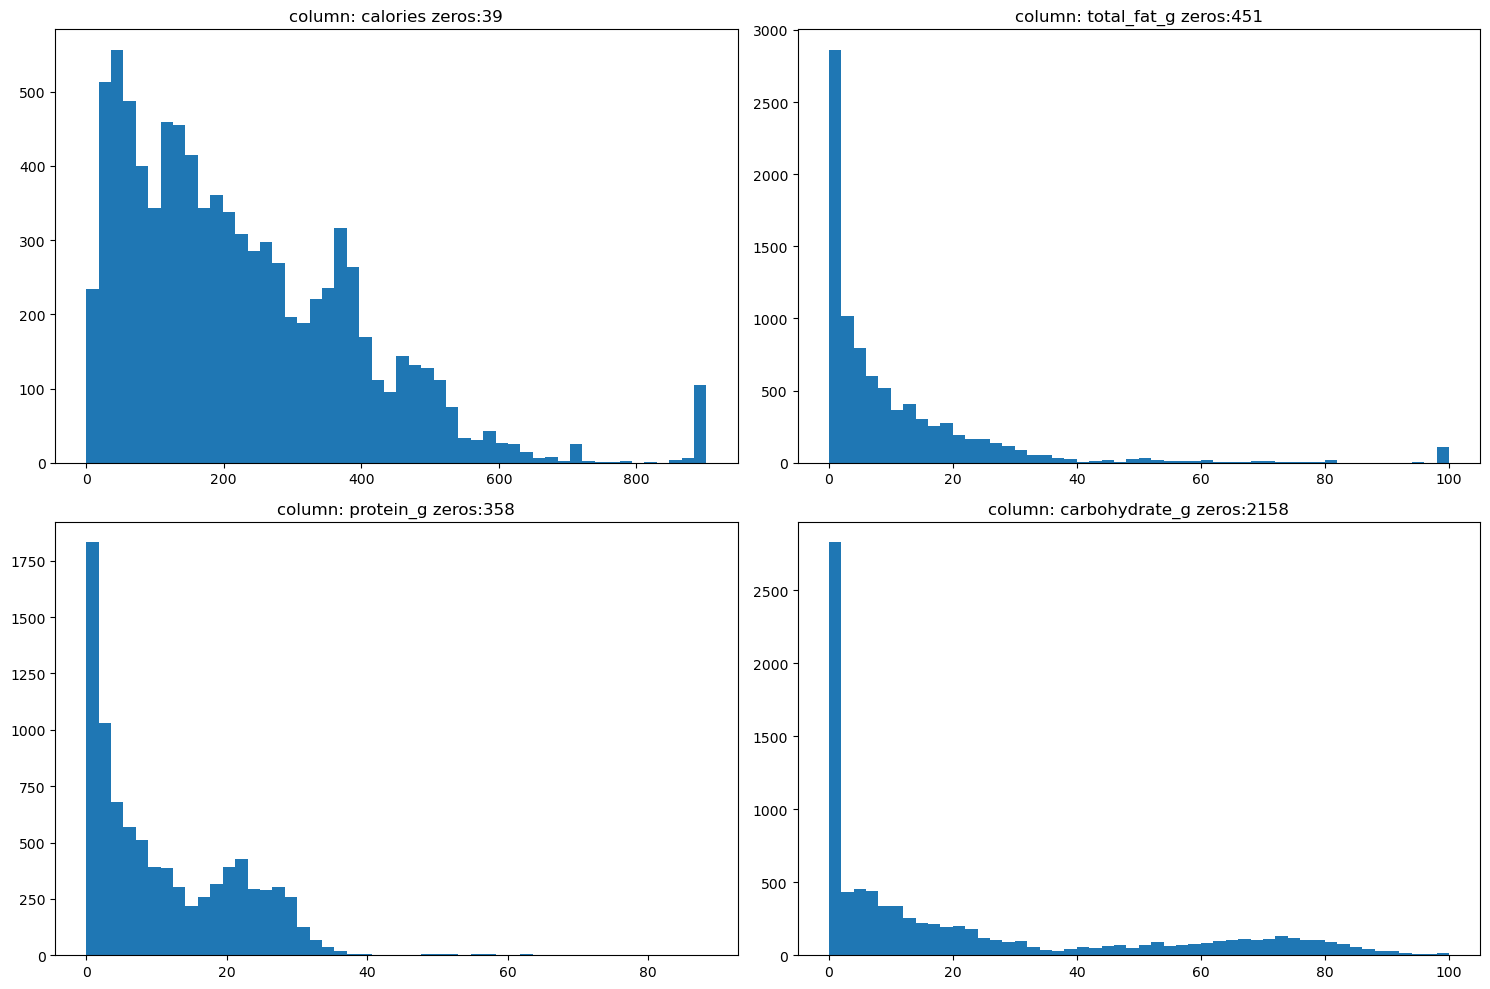

In [11]:
plot_histograms(df_macro_general)

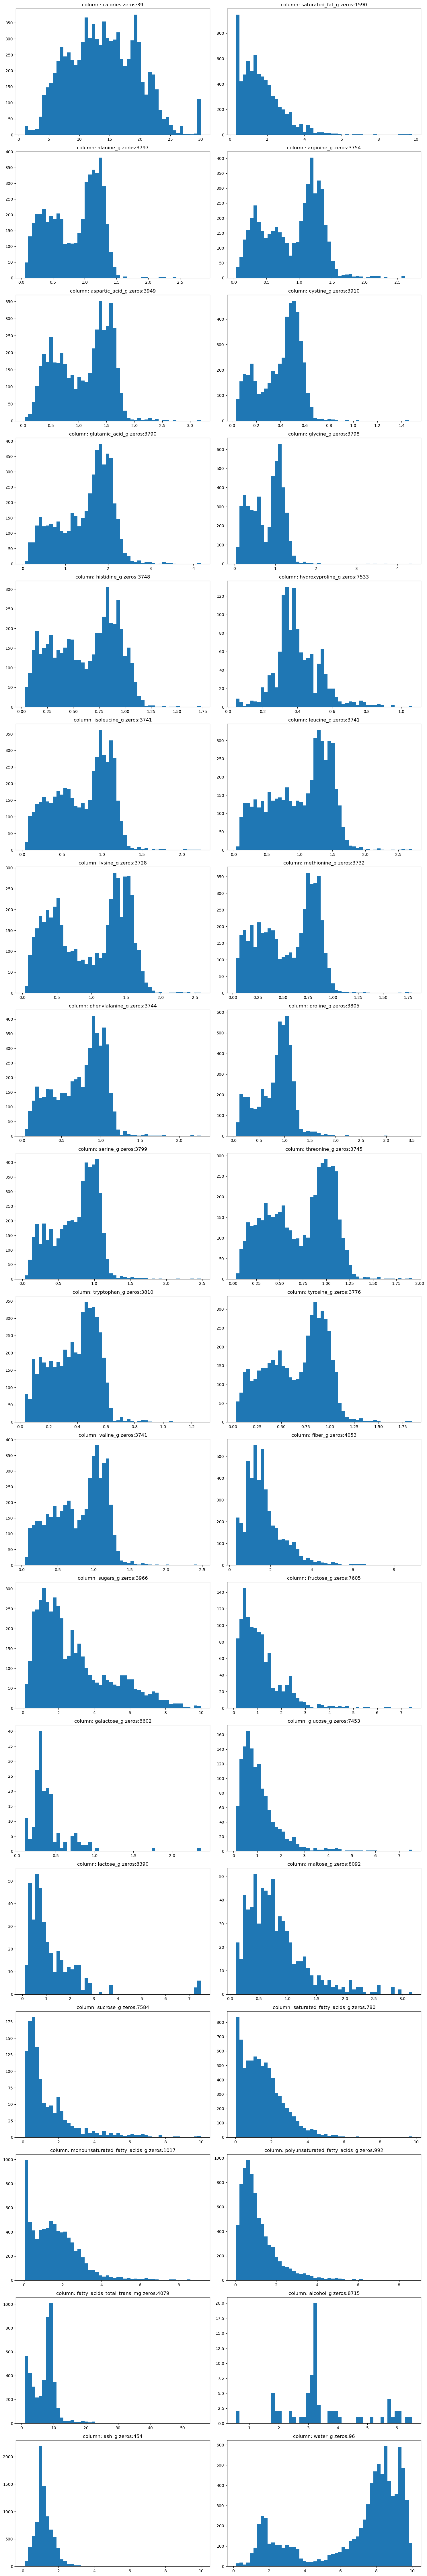

In [12]:
plot_histograms(df_macro_specific, sqrt=True)


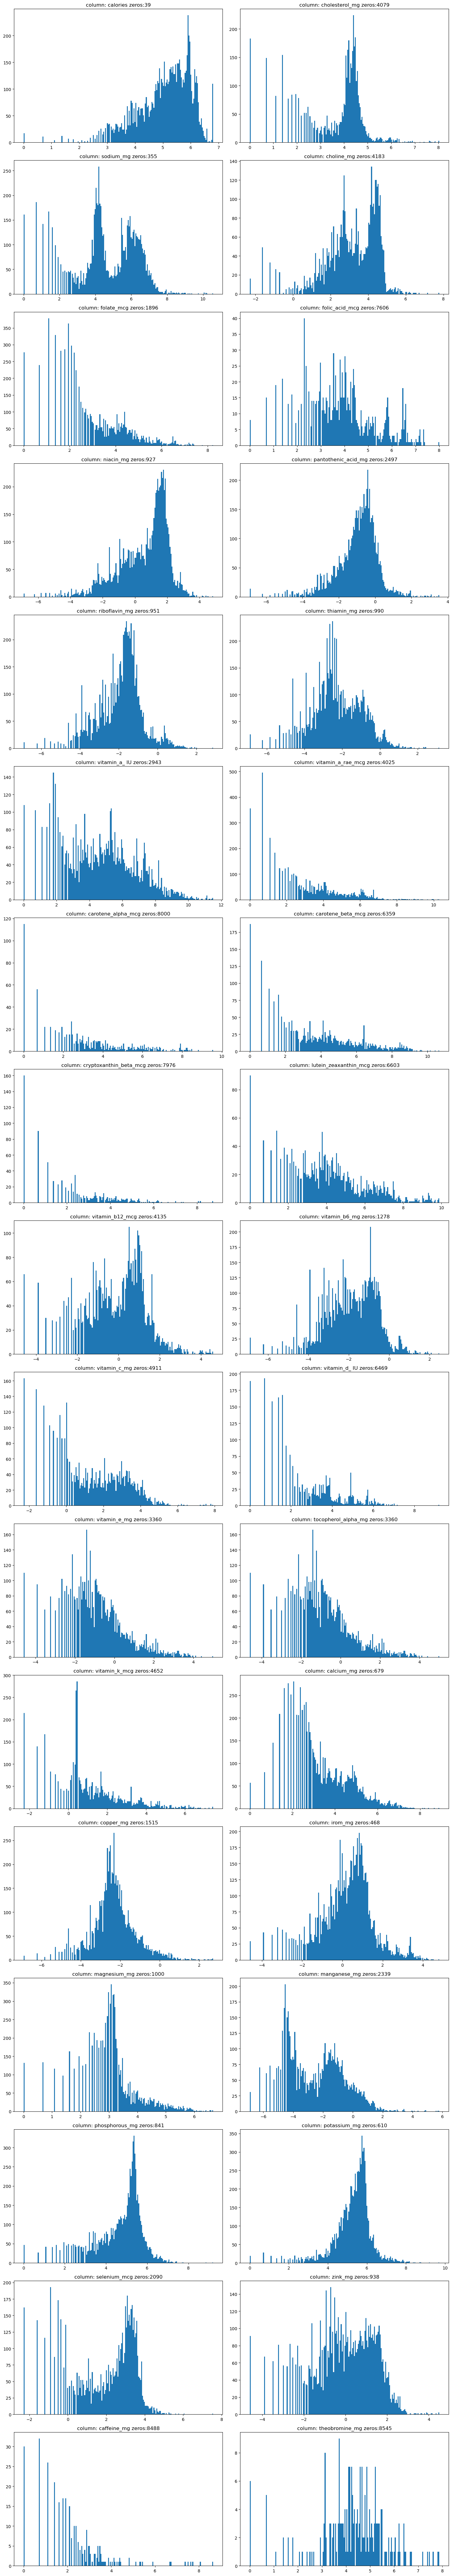

In [13]:
plot_histograms(df_micro, bins=200, log=True)

<div style="background-color: #e6eef7; padding:30px;">
Wykres przestawiający współczynniki zmienności poszczególnych zmiennych
</div>

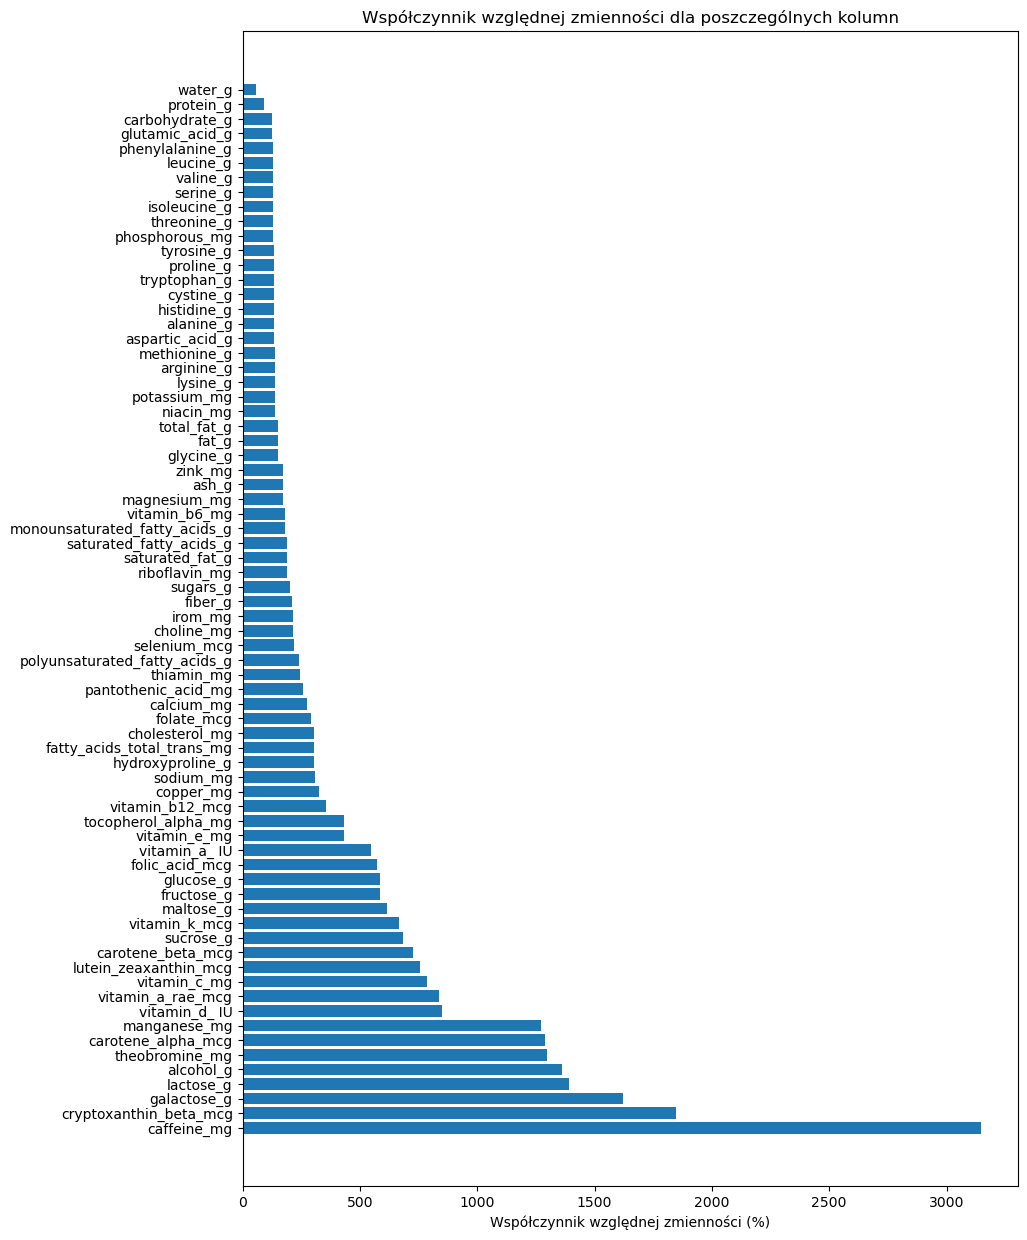

In [14]:
X = df.iloc[:,2:]
wsp = []
for col in X.columns:
    avg = np.average(X[col])
    std = np.std(X[col])
    wsp_zm = (std/avg) * 100
    wsp.append(wsp_zm)
    
indeksy = np.argsort(wsp)[::-1]
wsp = np.array(wsp)[indeksy]
nazwy = np.array(X.columns)[indeksy]

plt.figure(figsize=(10, 15))

plt.barh(nazwy, wsp)
plt.xlabel('Współczynnik względnej zmienności (%)')
plt.title('Współczynnik względnej zmienności dla poszczególnych kolumn')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">
Widać, że największą zmienność posiadają składniki, których w większości produktów spożywczych nie ma, a w innych występują w dużych ilościach, przykładami są kofeina, alkohol i laktoza.
</div>

<div style="background-color: #e6eef7; padding:30px;">
Wykres przestawiający współczynniki skośności poszczególnych zmiennych
</div>

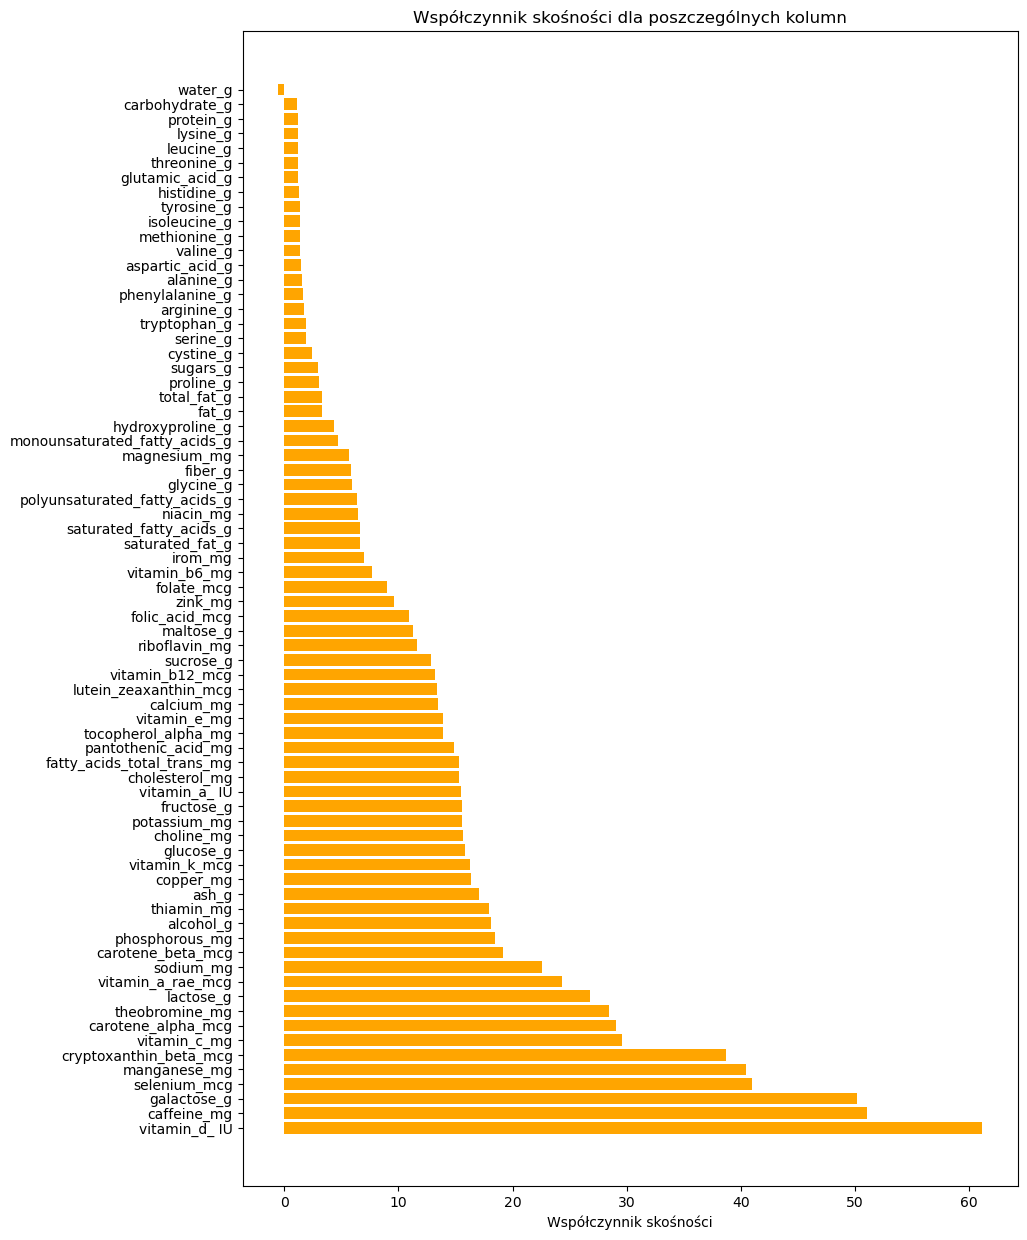

In [35]:
skosnosci = []
for col in X.columns:
    sk = X[col].skew()
    skosnosci.append(sk)

indeksy_skosnosci = np.argsort(skosnosci)[::-1]
skosnosci = np.array(skosnosci)[indeksy_skosnosci]
nazwy_skosnosci = np.array(X.columns)[indeksy_skosnosci]

plt.figure(figsize=(10, 15))

plt.barh(nazwy_skosnosci, skosnosci, color='orange')
plt.xlabel('Współczynnik skośności')
plt.title('Współczynnik skośności dla poszczególnych kolumn')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">

## Korelacje
* *df_macro_general*
    
> Jeżeli rozpatrzymy problem przewidywania kalorii na podstawie makroskładników, to okazuje się, że najbardziej skorelowaną cechą ze zmienną objaśnianą jest *total_fat_g*. Zmienne objaśniające wykazują niewielką korelację (wyjątek: korelacja między *carbohydrate_g* i *protein_g*). Wszystkie cechy mogą okazać się istotne.
    
* *df_macro_specific*

> Wiele cech opisujących substancje zaliczane do makroskładników jest silnie skorelowanych między sobą. Rozważając problem regresji, można przypuścić, że część cech będzie wyeliminować z tego powodu (nie wniosą zbyt wiele do rozwiązania problemu). 
* *df_micro*
    
> Cechy w tym zbiorze są najmniej ze sobą skorelowane. Rozważając problem przewidywania kaloryczności można posłużyć się wieloma różnymi cechami, które mają bezwzględny współczynnik korelacji na poziomie 0.1 - 0.3. Kombinacja tych cech może dać w efekcie dobrą jakość przewidywania.
</div>

In [15]:
corr_macro_g = df_macro_general.iloc[:, 1:].corr()
corr_macro_g.style.background_gradient(cmap='coolwarm')

In [16]:
corr_macro_s = df_macro_specific.iloc[:, 1:].corr()
corr_macro_s.style.background_gradient(cmap='coolwarm')

In [17]:
corr_micro = df_micro.iloc[:, 1:].corr()
corr_micro.style.background_gradient(cmap='coolwarm')

<div style="background-color: #e6eef7; padding:30px;">
Analiza zbioru df_macro_specific po usunięciu silnie skorelowanych kolumn
</div>

In [18]:
corr = df_macro_specific.iloc[:, 1:].corr()
prog_korelacji = 0.8
skorelowane = set()
zbior = set()

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        kor = corr.iloc[i, j]
        if abs(kor > prog_korelacji):    # korelacje większe niż 0.7 można uważać za mocne
            #print(f'{corr.columns[i]} z {corr.columns[j]} ma wysokoą korelacje: {kor}')
            skorelowane.add(corr.columns[j])
            zbior.add(corr.columns[i])
            zbior.add(corr.columns[j])
            
print(f'Ilość kolumn z korelacją do innej kolumny powyżej {prog_korelacji}, które można usunąć do celów regresji: {len(skorelowane)}')

Ilość kolumn z korelacją do innej kolumny powyżej 0.8, które można usunąć do celów regresji: 18


<AxesSubplot:>

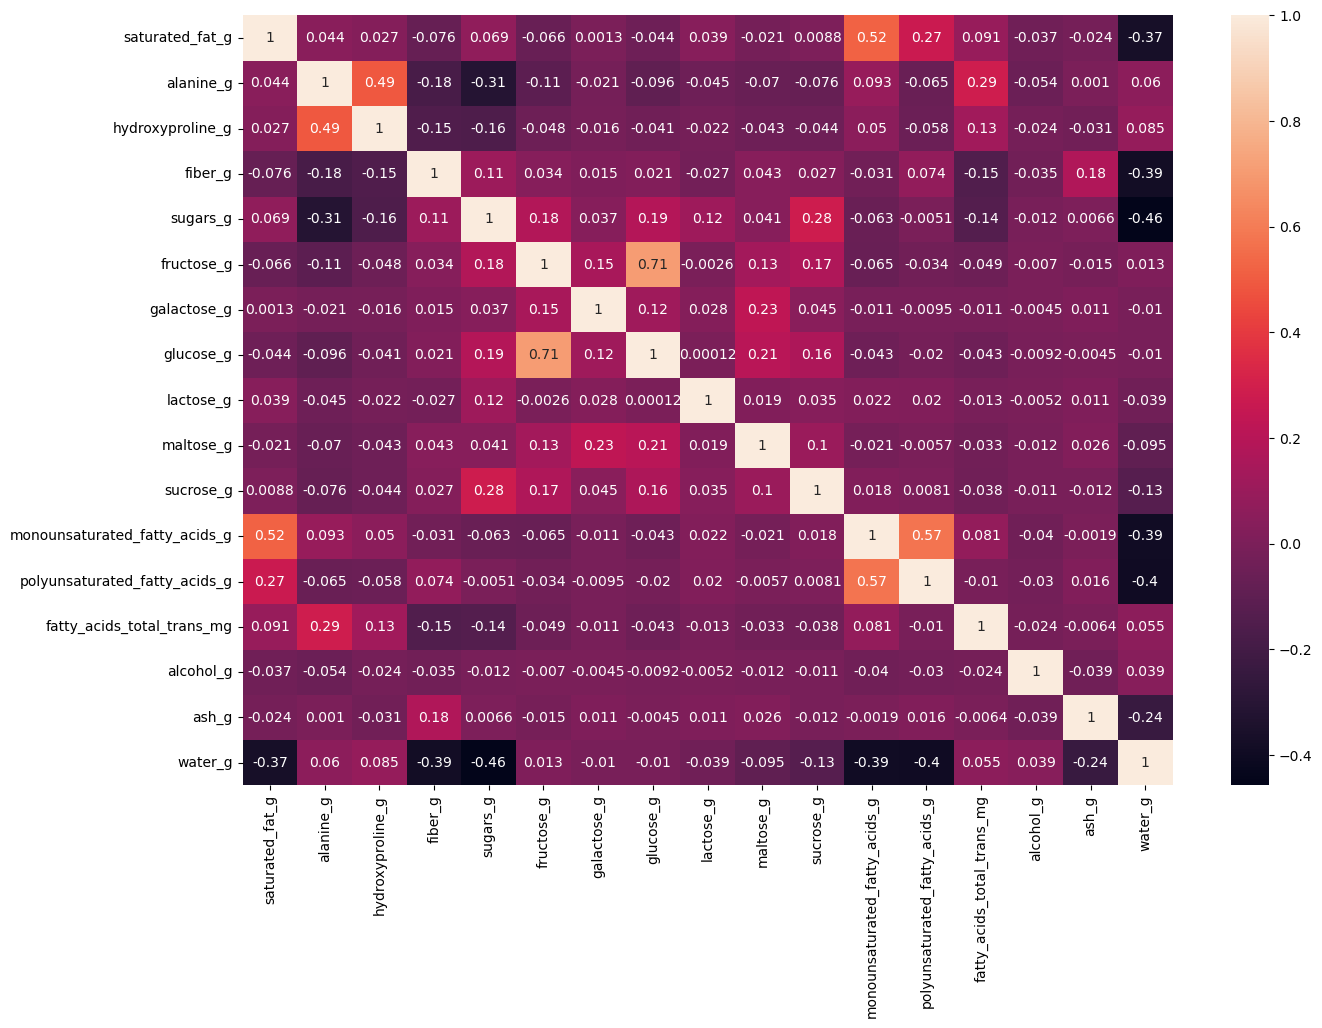

In [19]:
df_bez_korelacji = df_macro_specific.drop(columns=skorelowane)
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df_bez_korelacji.iloc[:,2:].corr(), annot=df_bez_korelacji.iloc[:,2:].corr())

<div style="background-color: #e6eef7; padding:30px;">

## Wizualizacje
    
Aby przedstawić dane w sposób wizualny, posłużono się dwoma metodami redukcji wymiarów - PCA (analizę głównych składowych) oraz t-SNE (stochastyczną metodę porządkowania sąsiadów w oparciu o rozkład t). Na podstawie tych wykresów można przypuszczać, czy skuteczne okaże się dopasowanie modelu liniowego (PCA) lub nieliniowego (t-SNE). Kolory punktów odpowiadają kaloryczności. 
    
    
W przypadku ramek *df_macro_general* i *df_macro_specific* na obu wykresach widać bardzo ładną, regularną strukturę punktów. Można założyć, że model liniowy będzie dla tych danych wystarczający, a predykcja będzie dokonywana z dużą dokładnością. 
    
    
Wykres PCA ramki *df_micro* wykazuje pewną regularność, jednak punkty bardziej na siebie nachodzą. Można wnioskować, że model liniowy może się okazać dla tych danych niewystarczający, przewidywanie będzie realizowane  bardziej na zasadzie niska-wysoka kaloryczność. Na wykresie t-SNE widać większe rozdzielenie klastrów. Można będzie więc spróbować dopasować do danych model nieliniowy. 
</div>

In [20]:
def plot_pca(df):
    scaled_data = preprocessing.scale(df.iloc[:, 2:])
    
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    pca_data = pca.transform(scaled_data)

    plt.figure(figsize=(28, 12))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df.iloc[:, 1].values)


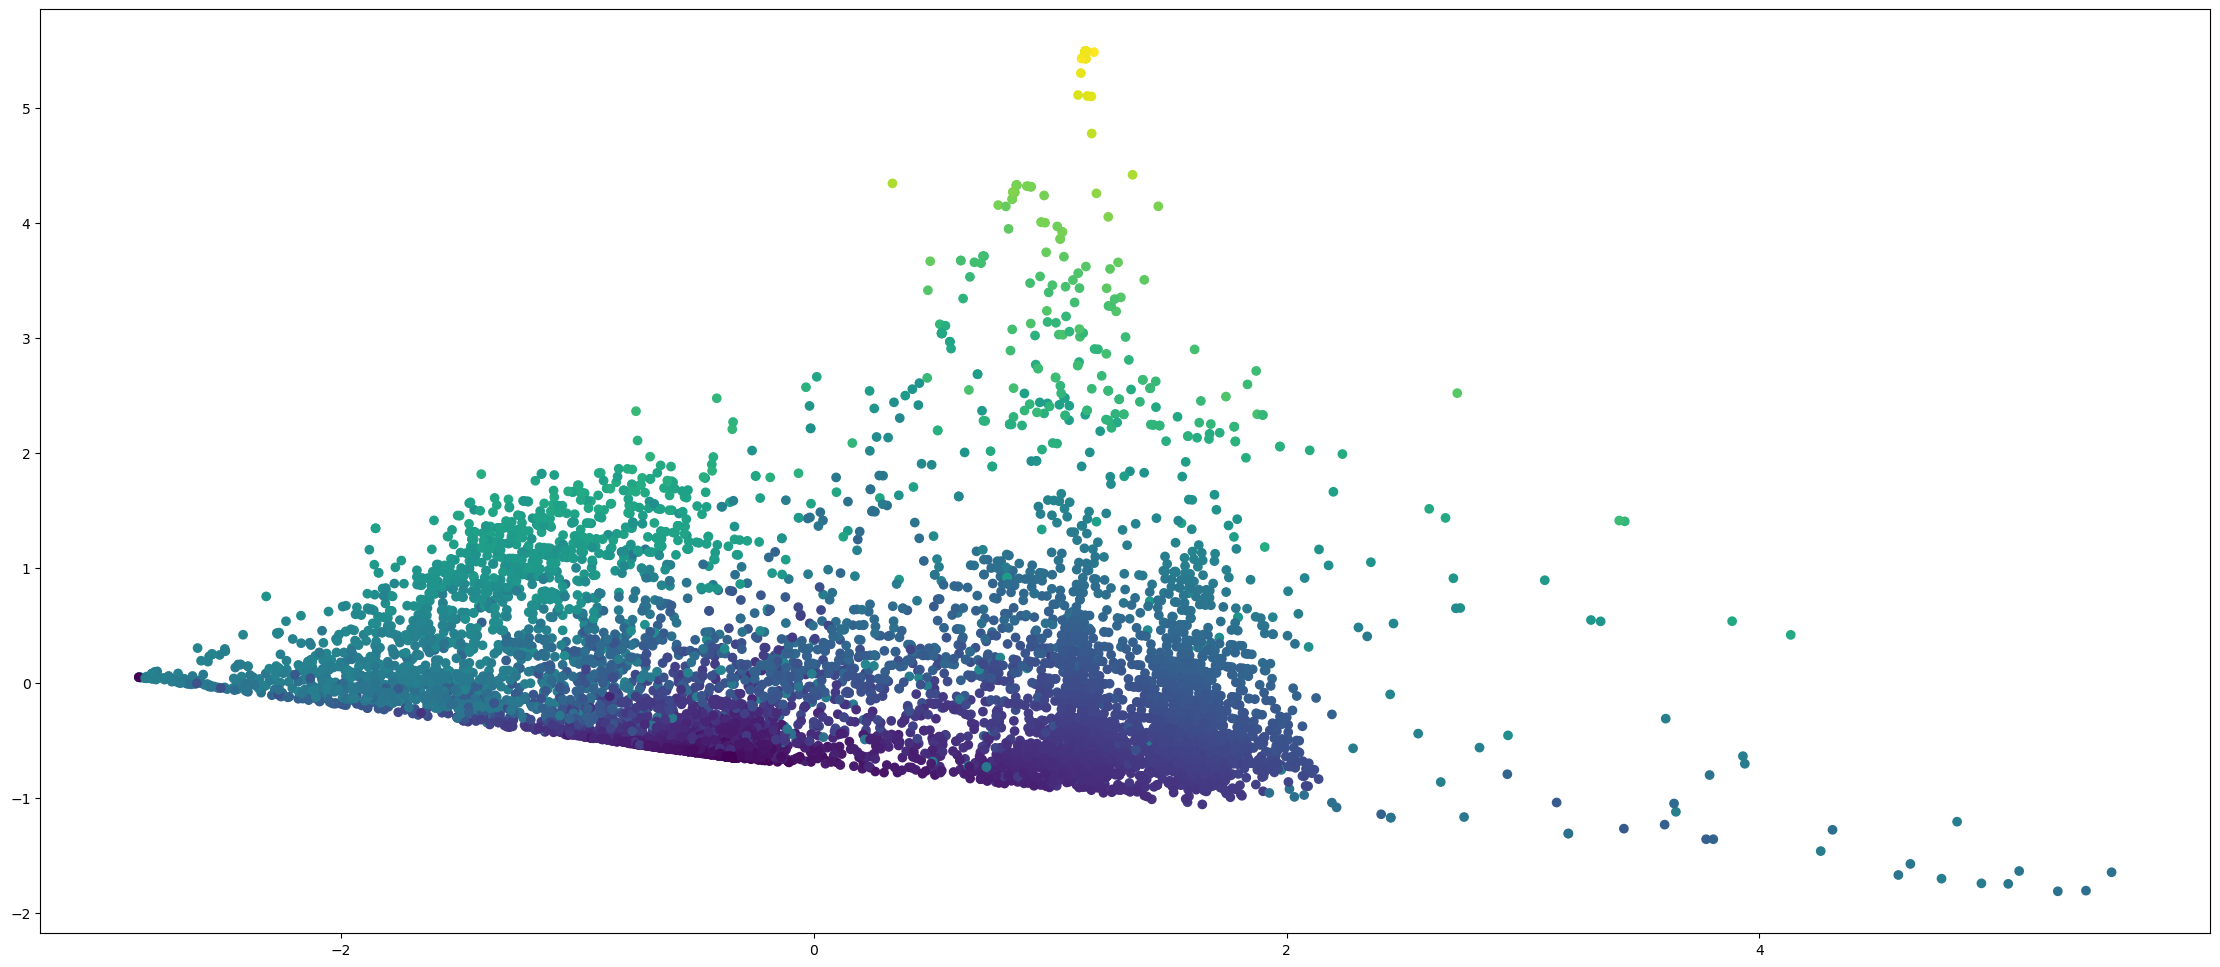

In [21]:
plot_pca(df_macro_general)

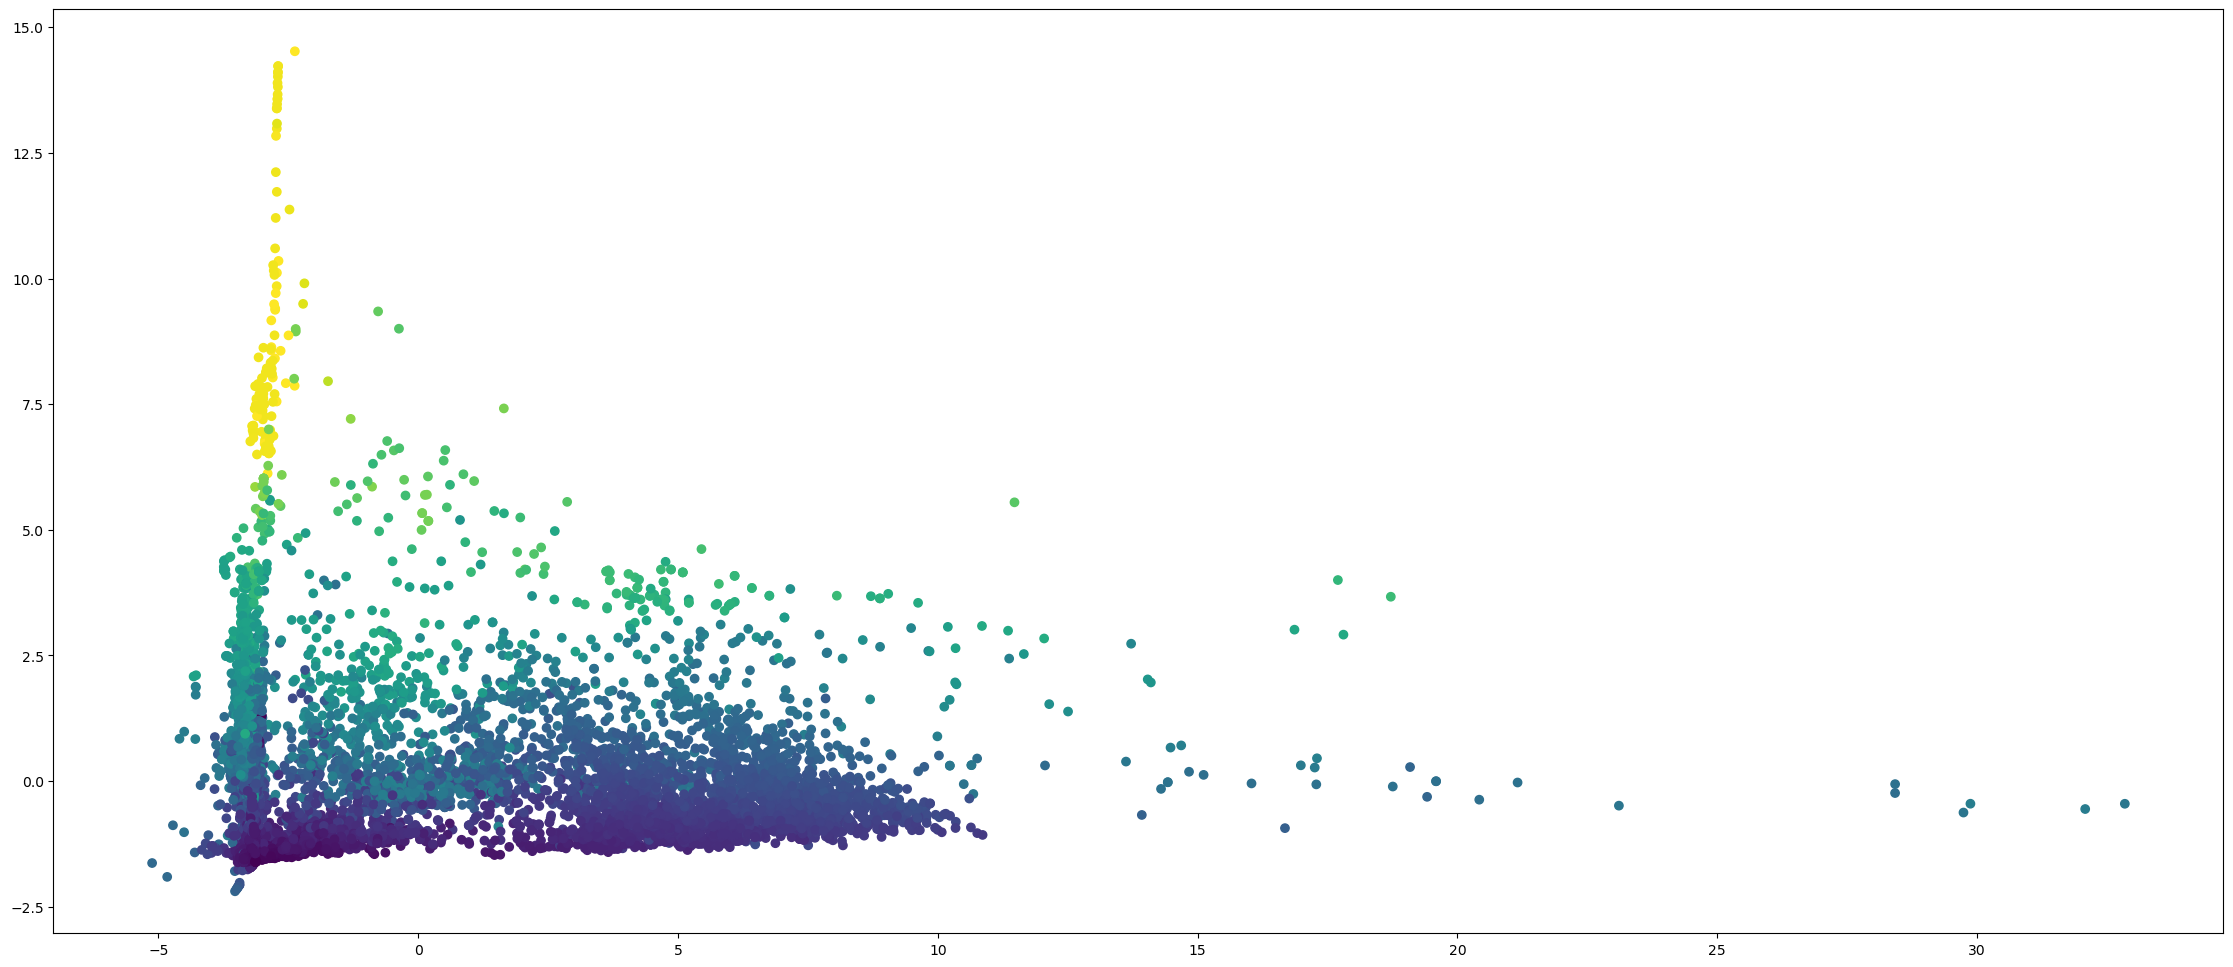

In [22]:
plot_pca(df_macro_specific)

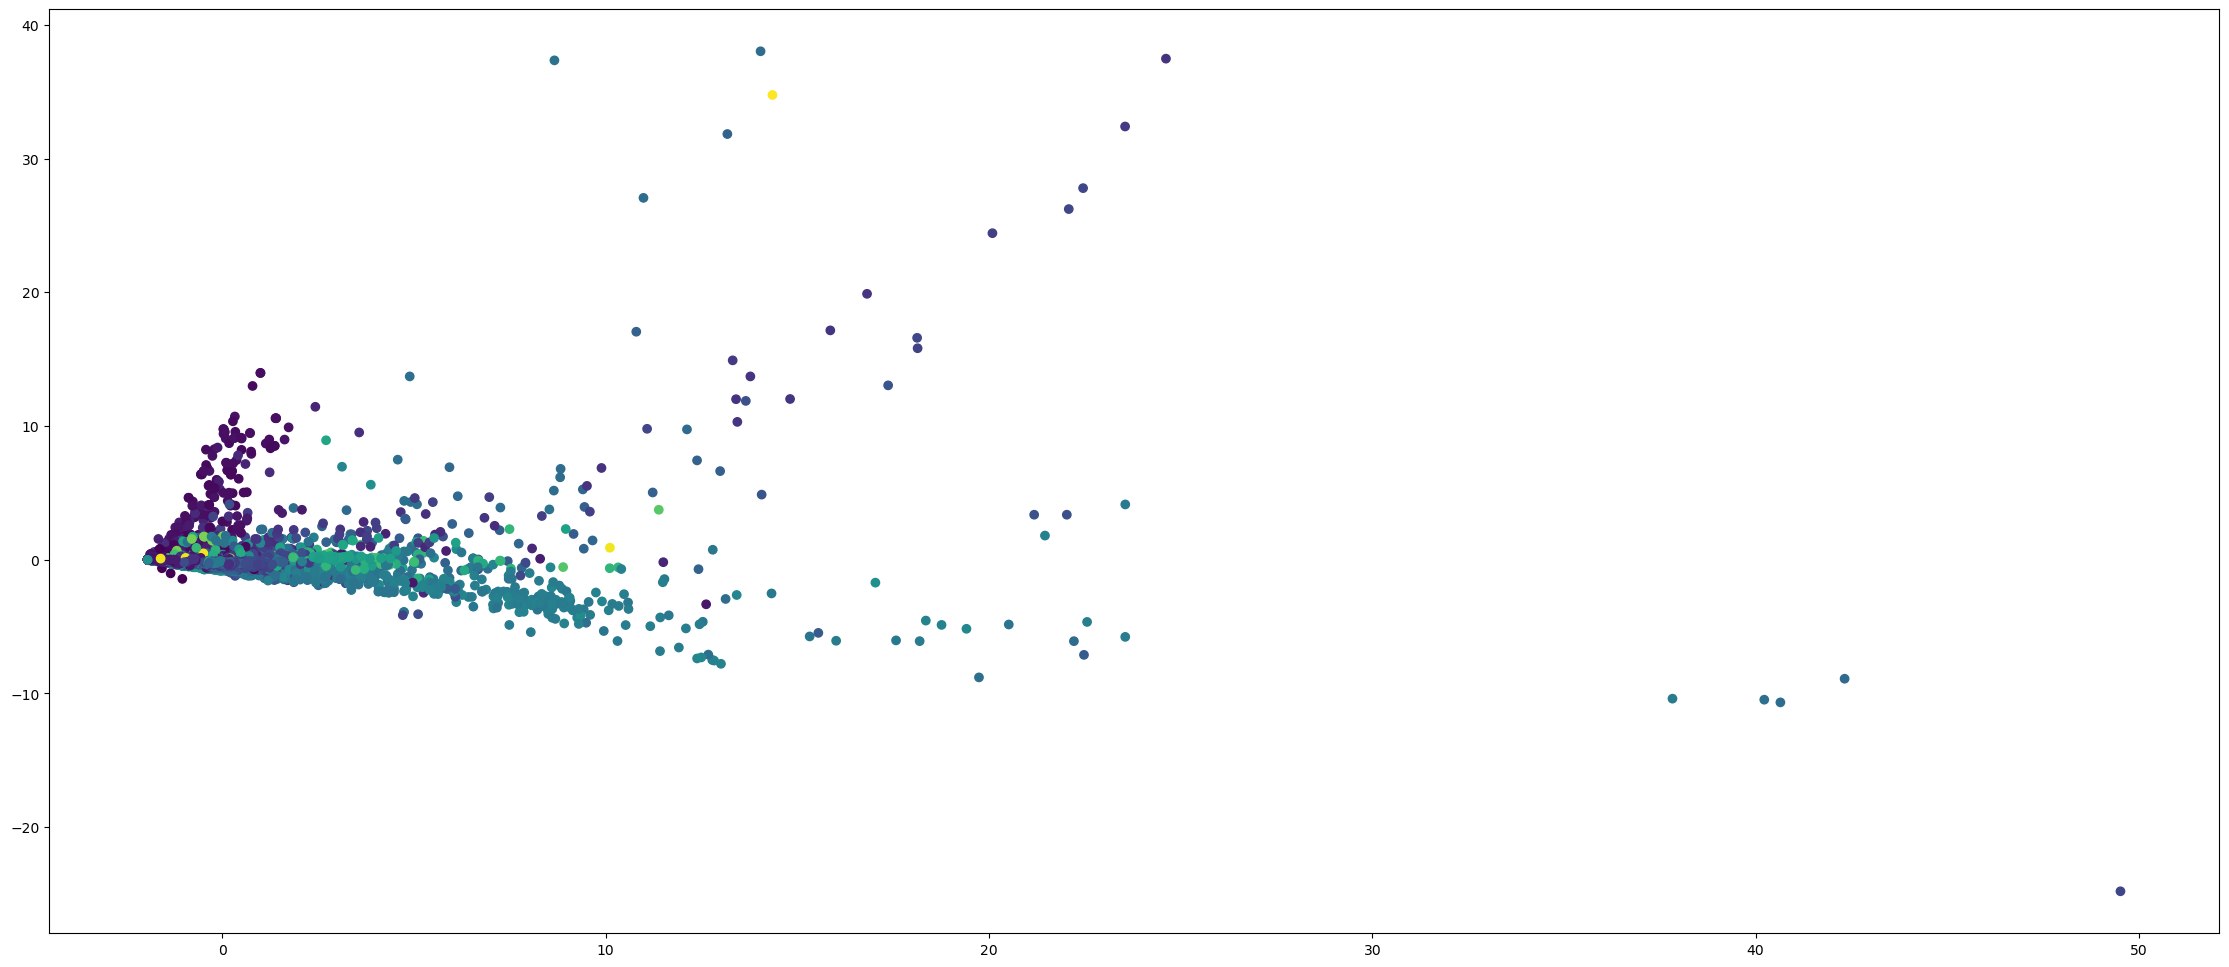

In [23]:
plot_pca(df_micro)

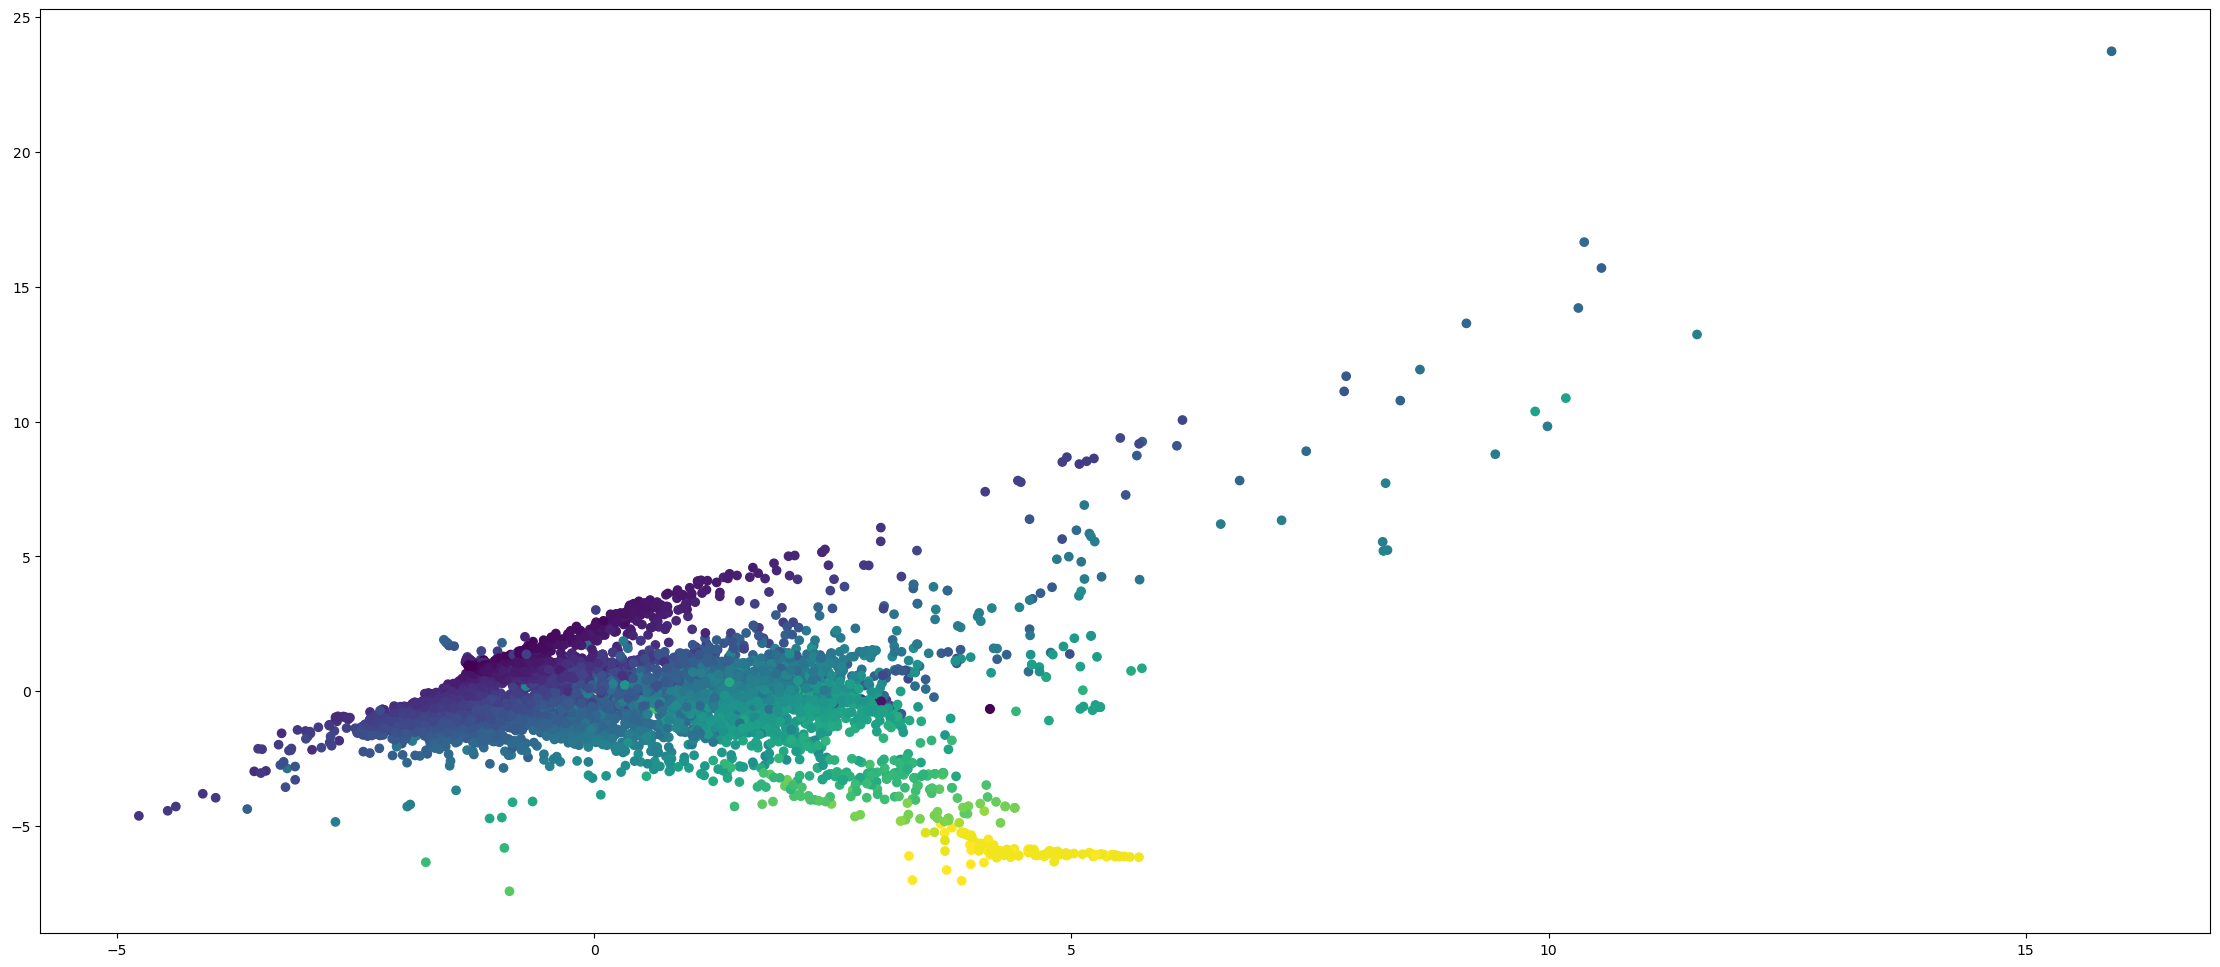

In [24]:
plot_pca(df_bez_korelacji)

In [25]:
def plot_tsne(df):
    scaled_data = preprocessing.scale(df.iloc[:, 2:])
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)

    plt.figure(figsize=(28, 12))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df.iloc[:, 1].values)
    plt.show()

E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


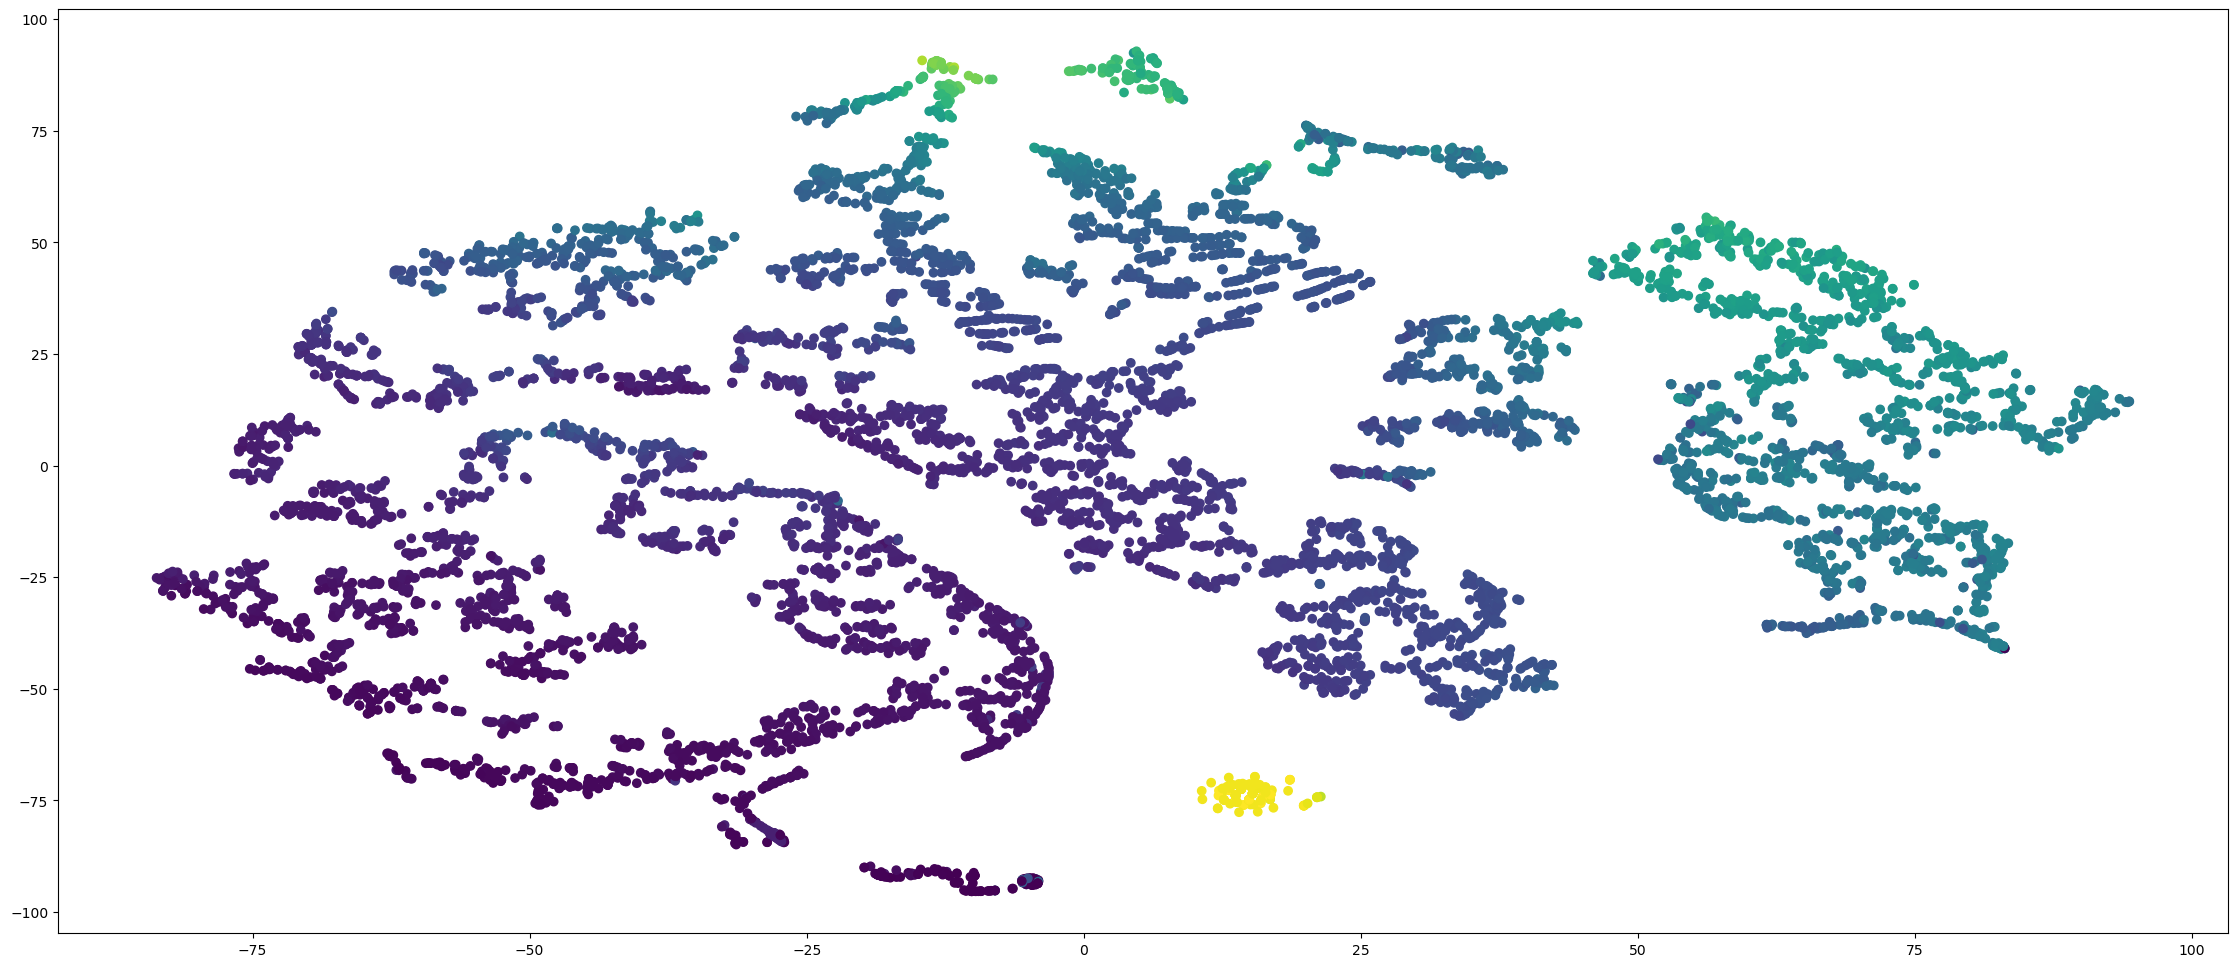

In [26]:
plot_tsne(df_macro_general)

E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


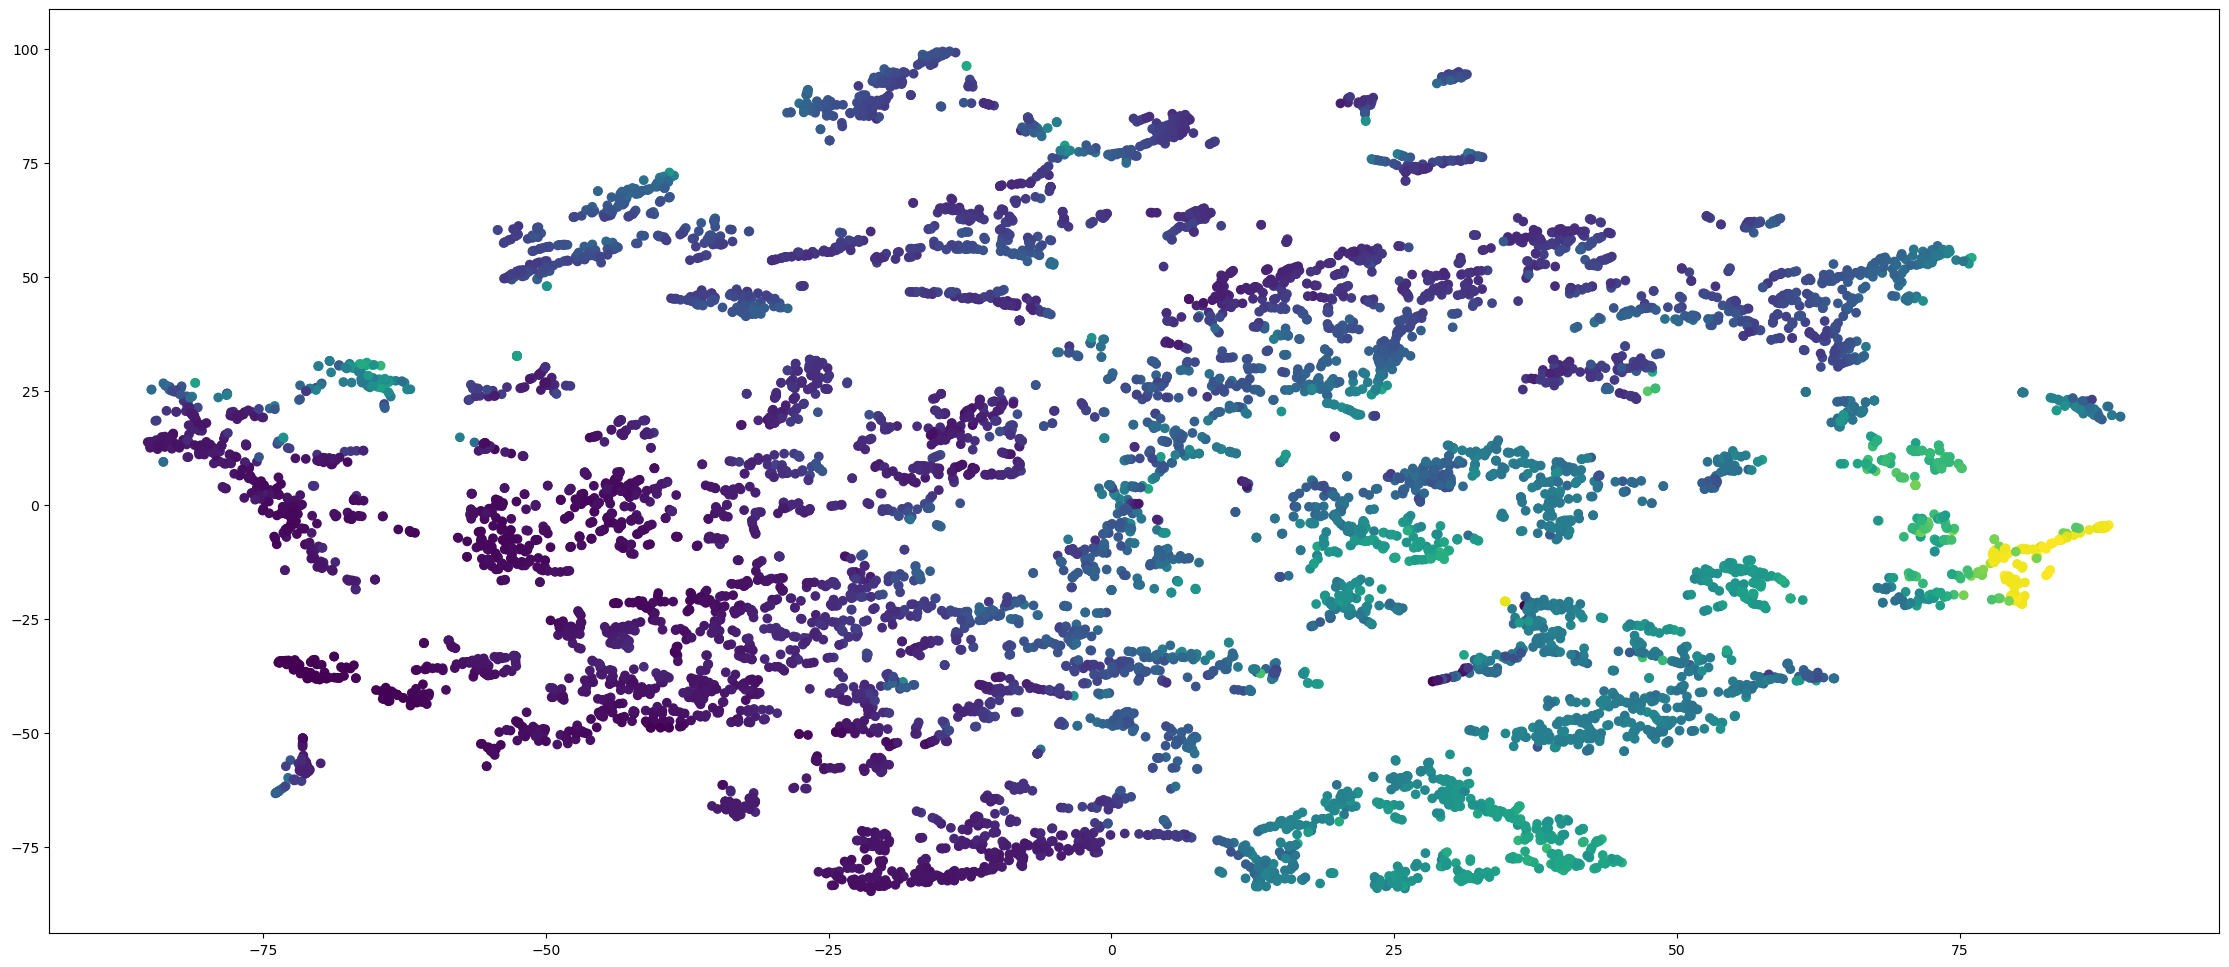

In [27]:
plot_tsne(df_macro_specific)

E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


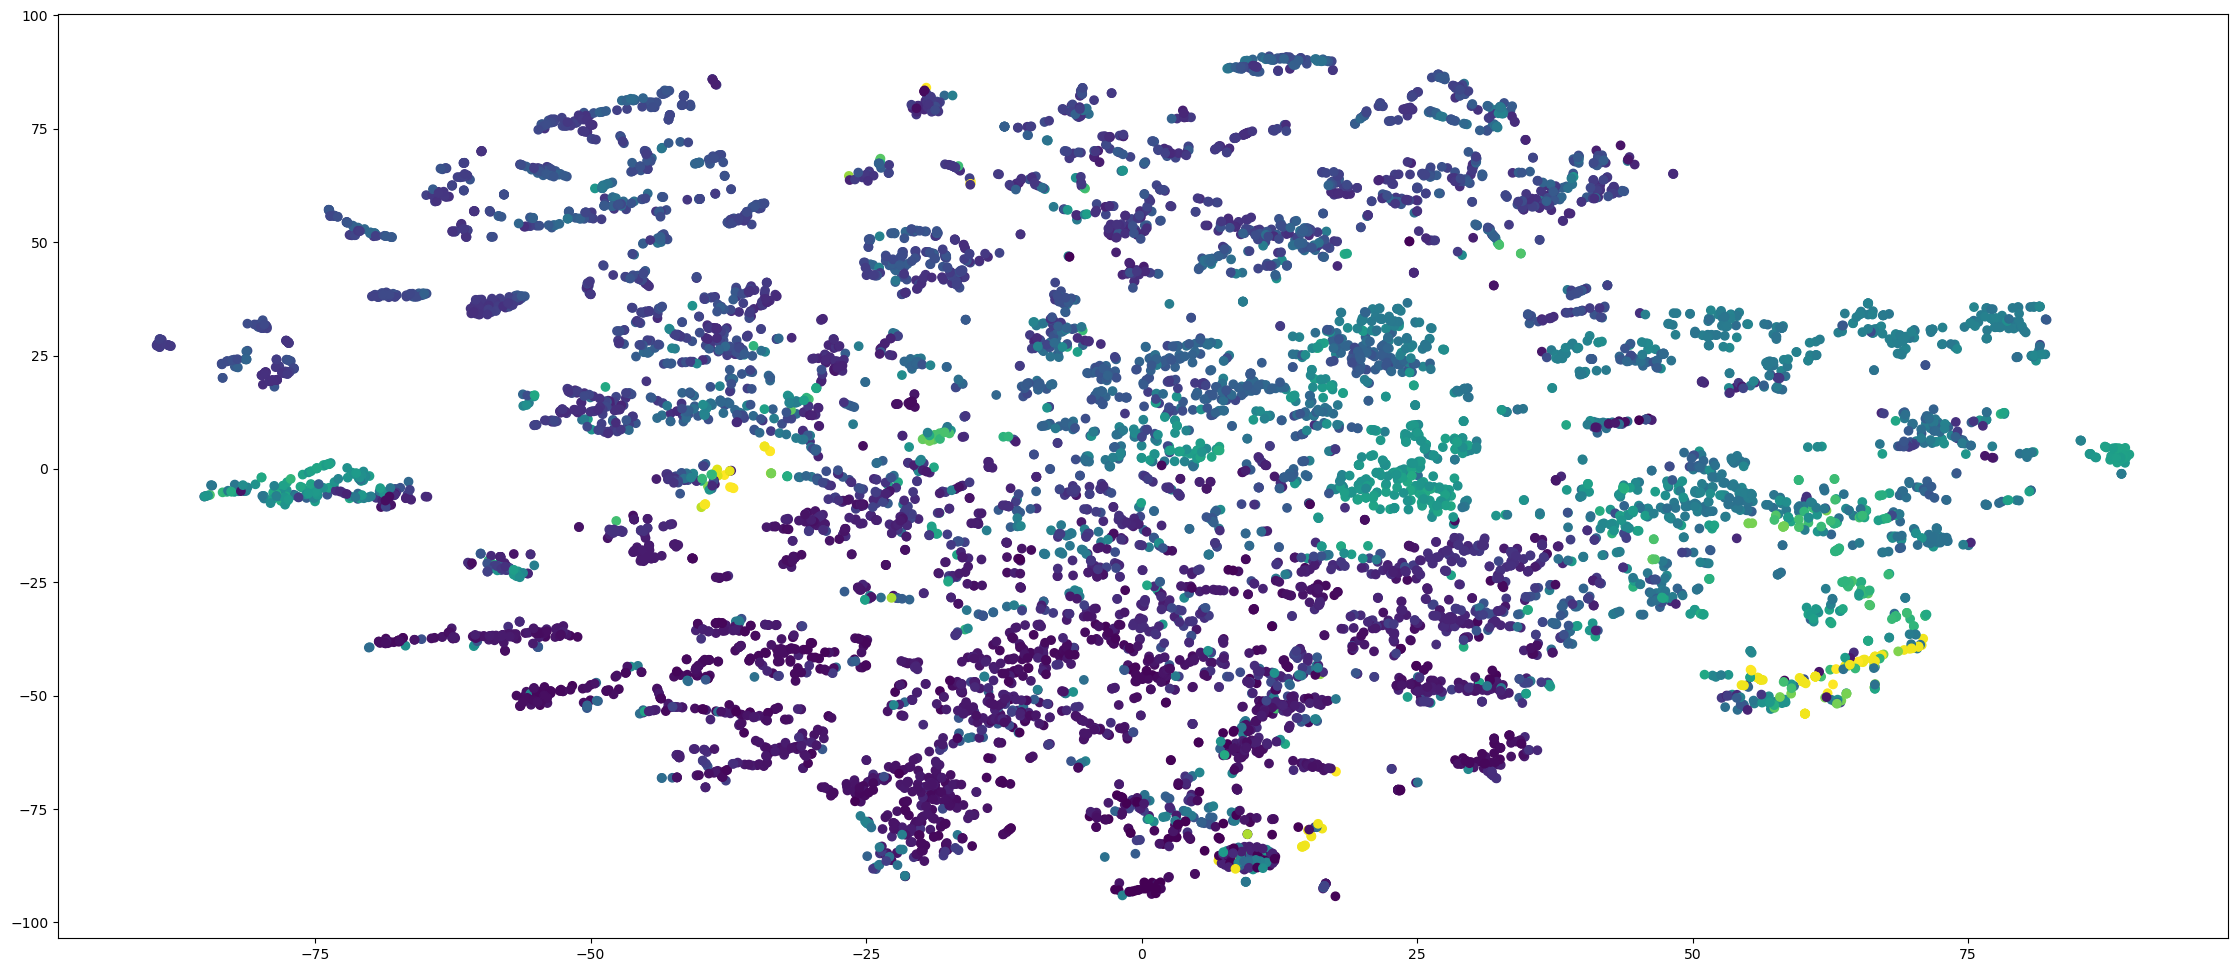

In [28]:
plot_tsne(df_micro)

E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


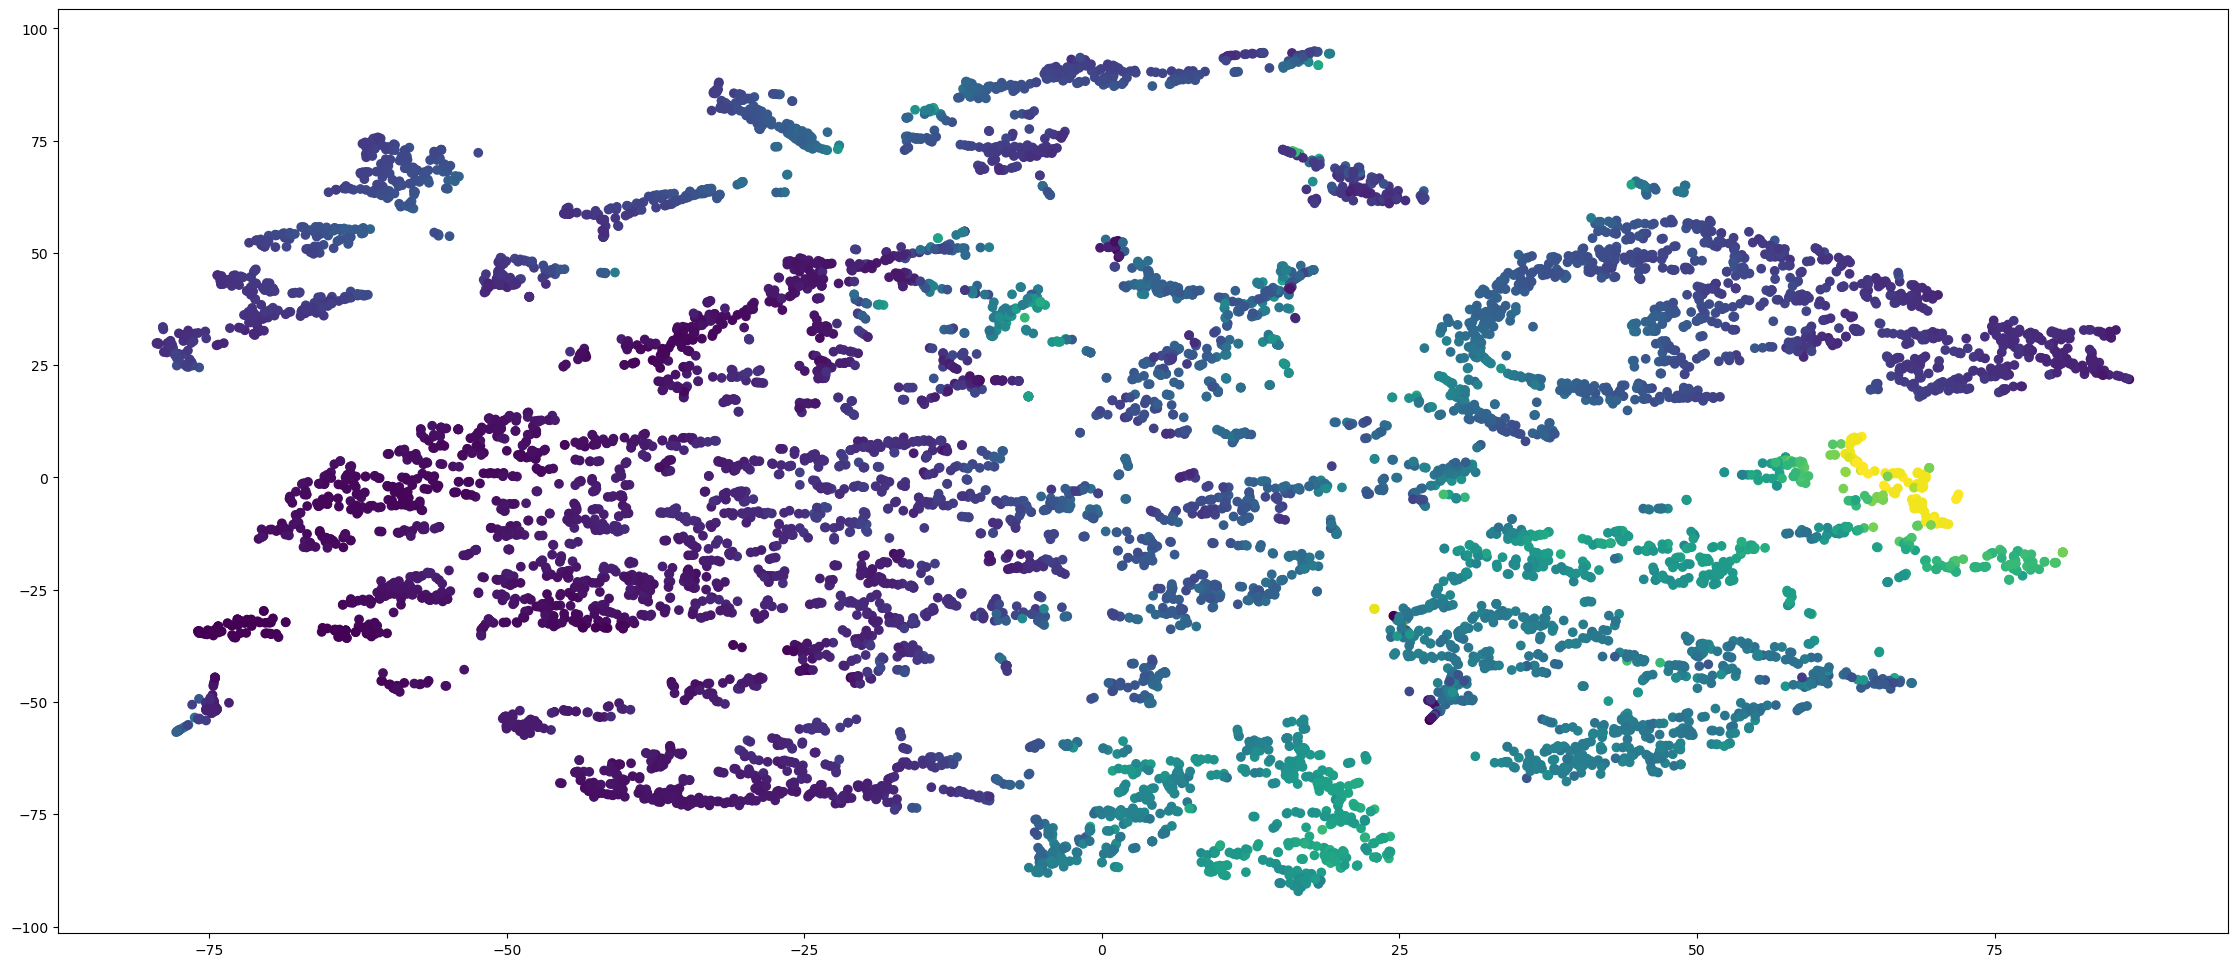

In [29]:
plot_tsne(df_bez_korelacji)

<div style="background-color: #e6eef7; padding:30px;">

## Podsumowanie

### Hipotezy:
    1. Kaloryczność produktu jest zależna w sposób liniowy od makroskładników (ogólnych).
    
    2. Kaloryczność produktu jest zależna w sposób liniowy od wyszczegółowionych makroskładników (nie będziemy się zajmować tym problemem w dalszej części).
    
    3. Kaloryczność produktu jest zależna w sposób nieliniowy od mikroskładników. Niemniej dopasowanie liniowe może okazać się do pewnego stopnia skuteczne.
    
    
Przypuszcza się, że regresja liniowa dla zbioru *df_macro_general* uwzględniająca wszystkie zmienne z atrybutem *calories* jako zmienną opisywaną będzie bardzo skuteczna i będzie mieć znikomy błąd dopasowania. 
    
Problem dopasowania modelu regresji będzie obszerniejszy dla zbioru *df_micro*. Niektóre z cech zostaną wyeliminowane ze względu na niewielką korelację z wynikiem. Dane powinny być znormalizowane, ponieważ niektóre z próbek mają wartości różniące się o kilka rzędów wielkości. Rozważa się zamianę niektórych cech na ich zlogarytmowane / spierwiastkowane wersje. Przeprowadzona będzie próba dopasowania modelu liniowego, jednak z dużym prawdopodobieństwem konieczna będzie zamiana modelu na nieliniowy w celu uzyskania przyzwoitej jakości. 
</div>